In [86]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



In [87]:
# Import and loading Mall_Customers dataset to a variable
mall_dataset = pd.read_csv("/Mall_Customers.csv")
# shape of Mall dataset
m,n = mall_dataset.shape
print(m,n)
# Observing the number of features and the number of labels
print('The number of features is: ', m)
# The number of examples
print('The number of examples in our dataset: ', n)
# Observing the first few rows of the data
print(mall_dataset.head(),'\n\n')
# describing the aggregate statistics
print(mall_dataset.describe())
# storing annual income and spending score columns in variable X and customer id, gender and age in variable y using iloc method
X = mall_dataset.iloc[:,[3,4]].values
y = mall_dataset.iloc[:,3].values
# print(X)
# print(y)

200 5
The number of features is:  200
The number of examples in our dataset:  5
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.5000

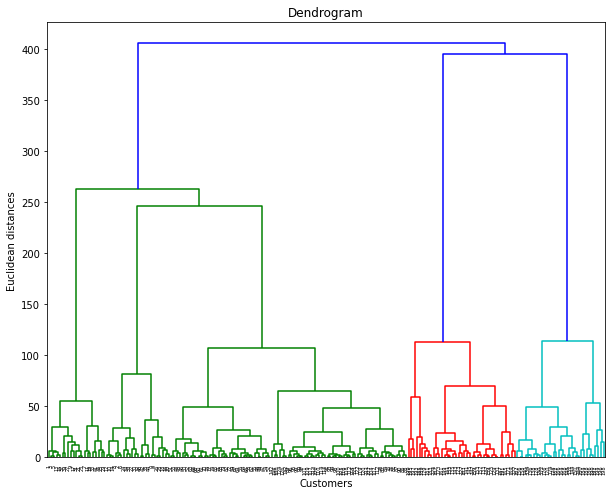

In [88]:
# creating a dendrogram
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # ward method helps to minimize variances within the clusters
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.show()

In [89]:
# Using AgglomerativeClustering to fit the clusters to the dataset
hierchial_cluster = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage = 'ward')  
y_hc = hierchial_cluster.fit_predict(X)

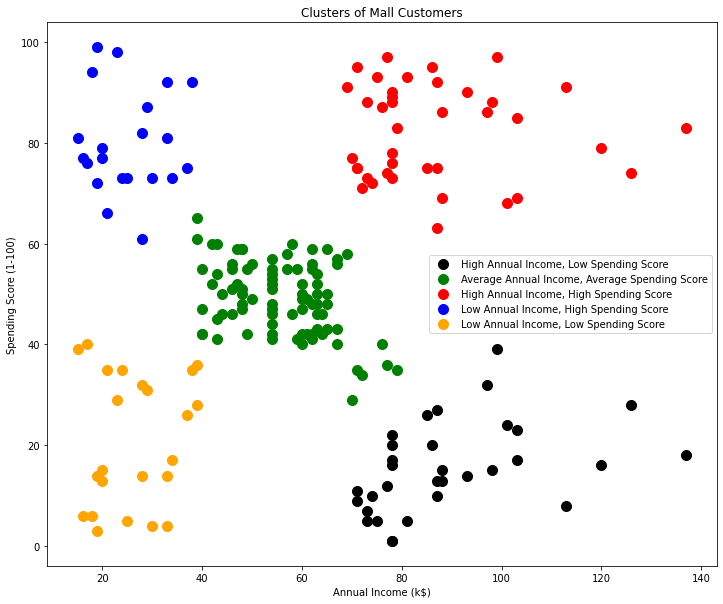

In [90]:
# visualizing the clusters using scatter plot
plt.figure(figsize=(12,10))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'black', label = "High Annual Income, Low Spending Score")  
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = "Average Annual Income, Average Spending Score")  
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = "High Annual Income, High Spending Score")  
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'blue', label = "Low Annual Income, High Spending Score")  
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = "Low Annual Income, Low Spending Score")
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
# plt.legend(fontsize=8)
# plt.legend(loc=9)

# plt.subplots_adjust(right=1) 


